In [35]:
from mat2vec.processing import MaterialsTextProcessor
from gensim.models import Word2Vec
from gensim.models.fasttext import FastText
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


w2v_model = Word2Vec.load("/Users/alucic2/Documents/GitHub/mat2vec/mat2vec/training/models/pretrained_embeddings")

#text_processor = MaterialsTextProcessor()
#text_processor.process("LiCoO2 is a battery cathode material.")

(['CoLiO2', 'is', 'a', 'battery', 'cathode', 'material', '.'],
 [('LiCoO2', 'CoLiO2')])

In [36]:
def word_similar():
    while True:
        try:
            word = input("Please enter the word that you are interested in exploring:\n")
        except ValueError:
            continue
        if word not in w2v_model.wv.vocab:
            print(f'The word is not in the vocabulary, please choose a different word')
            continue
        elif word in w2v_model.wv.vocab:
                  similar_words = w2v_model.wv.most_similar(word, topn=10)
        return similar_words

In [37]:
word_similar()

Please enter the word that you are interested in exploring:
polymer


[('polymers', 0.825886070728302),
 ('polymeric', 0.8206982612609863),
 ('copolymer', 0.7709658145904541),
 ('polymer_matrix', 0.768335223197937),
 ('PMMA', 0.7311726212501526),
 ('polymer_blend', 0.730010449886322),
 ('polystyrene', 0.7110731601715088),
 ('polymeric_matrix', 0.7094563245773315),
 ('polymer_chains', 0.7013325691223145),
 ('poly(methyl_methacrylate', 0.6984857320785522)]

In [ ]:
def analogies():
    word1 = input("Please enter the word that you are interested in studying analogies to: \n")
    word2 = input ("Please enter the word that is similar to the earlier word: \n")
    word3 = input("Please enter the word that you are interested in studying analogies to:\n")
    word_analogous = w2v_model.wv.most_similar(positive=[word1, word2], negative=[word3], topn=1)
    sentence = '{} is to {} as {} is to ...'.format(word1, word2, word3)
    print(sentence)
    return word_analogous

In [ ]:
analogies()

In [49]:
def explore_words():
    st =[]
    while True:
        input_string = input("Please enter the element/material you are interested in exploring/visualizing:")
        try:
            if input_string not in w2v_model.wv.vocab:
                print('The following is not in vocabulary:' + ' ' + input_string + ' ' + 'please replace the word')
                continue       
            elif input_string in w2v_model.wv.vocab:
                print(f'The following word is in vocabulary' + ' ' + input_string)
                st.append(input_string)
                answer = input(f'Would you like to enter more words? Please enter "Yes" or "No"')
                if answer =='Yes' or answer == 'yes':
                    continue
                elif answer == 'No' or answer == 'no':
                    return st
        except ValueError:
            break
    similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=10)]
                  for search_term in st}
    return similar_words

In [50]:
st = explore_words()

Please enter the element/material you are interested in exploring/visualizing:polymer
The following word is in vocabulary polymer
Would you like to enter more words? Please enter "Yes" or "No"yes
Please enter the element/material you are interested in exploring/visualizing:mg
The following word is in vocabulary mg
Would you like to enter more words? Please enter "Yes" or "No"yes
Please enter the element/material you are interested in exploring/visualizing:helium
The following word is in vocabulary helium
Would you like to enter more words? Please enter "Yes" or "No"yes
Please enter the element/material you are interested in exploring/visualizing:carbon
The following word is in vocabulary carbon
Would you like to enter more words? Please enter "Yes" or "No"yes
Please enter the element/material you are interested in exploring/visualizing:zinc
The following word is in vocabulary zinc
Would you like to enter more words? Please enter "Yes" or "No"yes
Please enter the element/material you ar

In [56]:
def plot_render():
    words = sum([[k] + v for k, v in similar_words.items()], [])
    wvs = w2v_model.wv[words]

    pca = PCA(n_components=2)
    np.set_printoptions(suppress=True)
    P = pca.fit_transform(wvs)
    labels = words

    plt.figure(figsize=(18, 10))
    plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
    for label, x, y in zip(labels, P[:, 0], P[:, 1]):
        plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')
    plt.show()

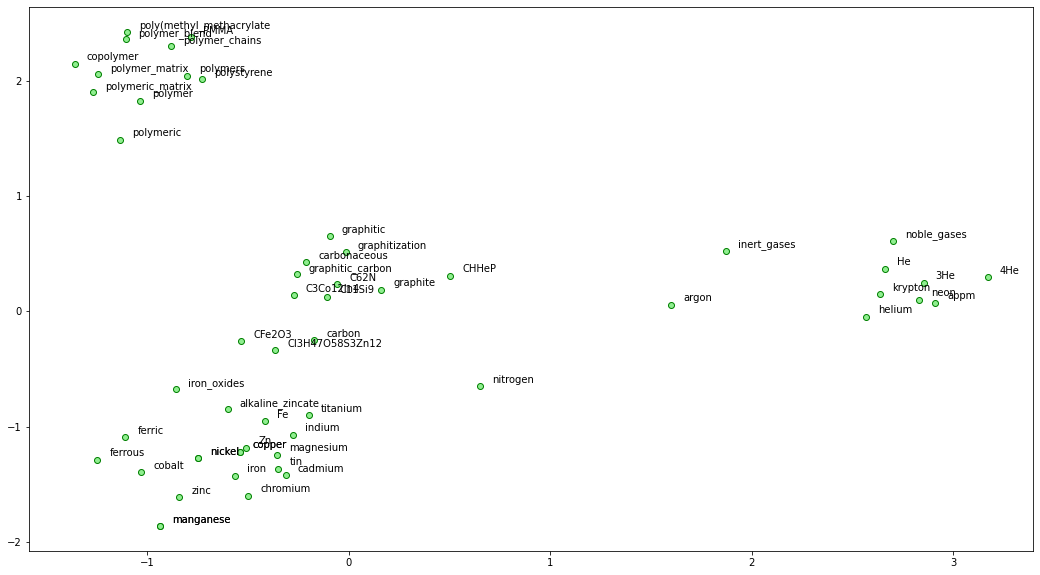

In [57]:
plot_render()

In [55]:
import anvil.server

In [ ]:
wvs = w2v_model.wv[words]


In [ ]:
anvil.server.connect("SADHVDZ54VLBHCCOD7Z77NJM-YSXOUZ2HXPOPTPRN")

In [ ]:
@anvil.server.callable
def say_hello(name):
  print("Hello from the uplink, %s!" % name)

anvil.server.wait_forever()
